# Data cience & statistical Computing
## Checkpoint 1 - 2 Sem - Análise de dados de filmes ou séries

Guilherme Morais - RM 551981 <br>
Lorenzo Ferreira - RM 97318 <br>

Fonte de dados:
1. Netflix - Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows
2. IMBD: https://www.imdb.com/

In [39]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [35]:
# Carregando os datasets
netflix_df = pd.read_csv('netflix_titles.csv')
imdb_df = pd.read_csv('movies_initial.csv')

## 1. Quantidade de tipos de titulos na Netflix
Pode se analisar que a maior quantia de titulos dentro da netflix sao filmes, tento menos da metade de seus titulos como séries de tv

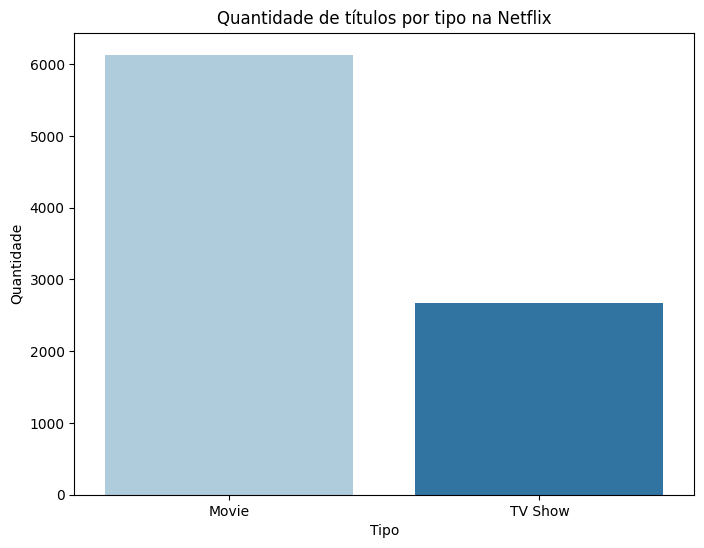

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(netflix_df, x='type', hue='type', palette='Paired')
plt.title('Quantidade de títulos por tipo na Netflix')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.show()

# 2. Número de lançamentos por ano na Netflix a partir dos anos 2000
É possivel observar no grafico o começo da netflix e seus lançamentos

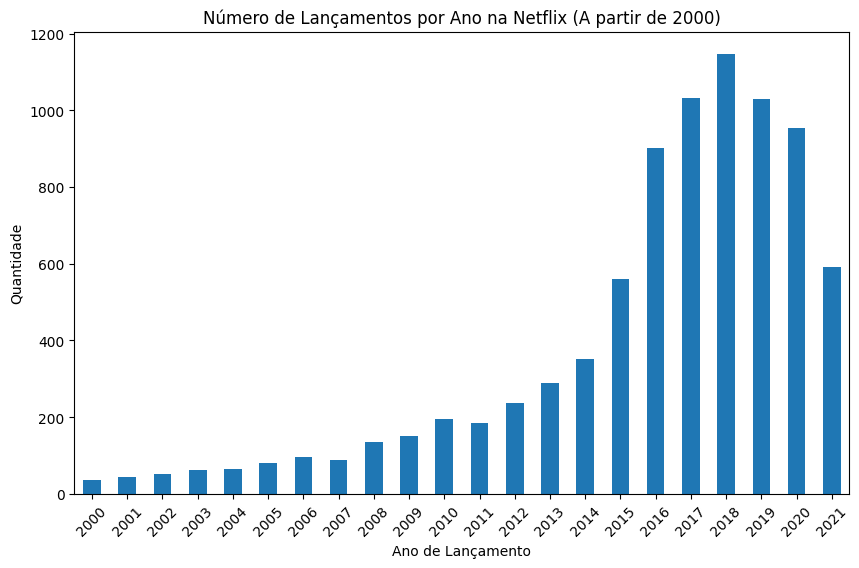

In [ ]:
# Filtrar apenas os lançamentos a partir do ano 2000
netflix_df_2000 = netflix_df[netflix_df['release_year'] >= 2000]

# Gerar o gráfico de lançamentos por ano a partir de 2000
plt.figure(figsize=(10, 6))
netflix_df_2000['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de Lançamentos por Ano na Netflix (A partir de 2000)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo X para melhor visualização
plt.show()

# 3. Relação entre duração de filmes e quantidade de títulos

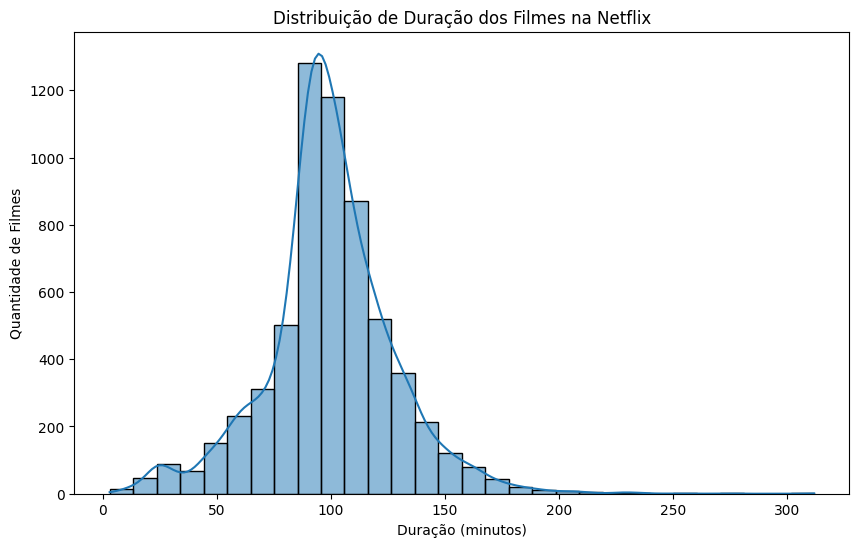

In [ ]:
movies_df = netflix_df[netflix_df['type'] == 'Movie']
movie_dr = movies_df['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(movie_dr, kde=True, bins=30)
plt.title('Distribuição de Duração dos Filmes na Netflix')
plt.xlabel('Duração (minutos)')
plt.ylabel('Quantidade de Filmes')
plt.show()

# 4. Relação entre quantidade de títulos adicionados e mês de lançamento

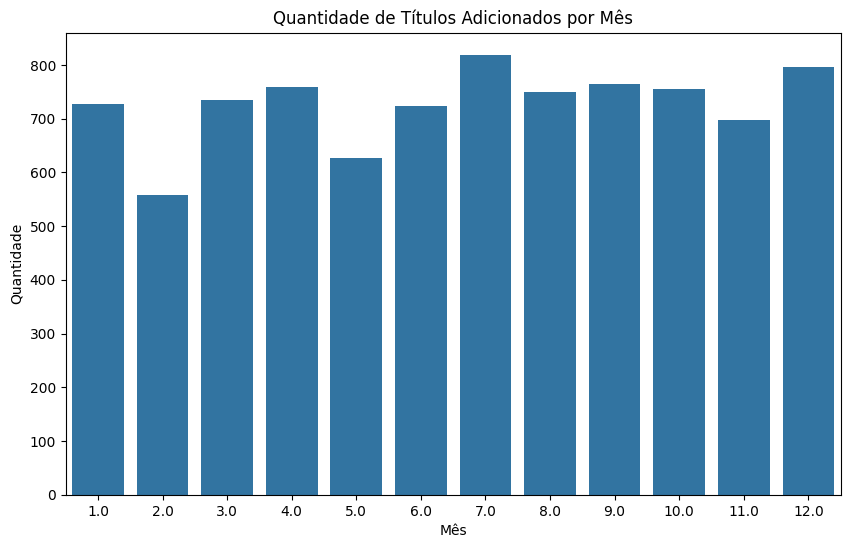

In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['month_added'] = netflix_df['date_added'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(netflix_df, x='month_added')
plt.title('Quantidade de Títulos Adicionados por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.show()

# 5. Países com mais títulos na Netflix

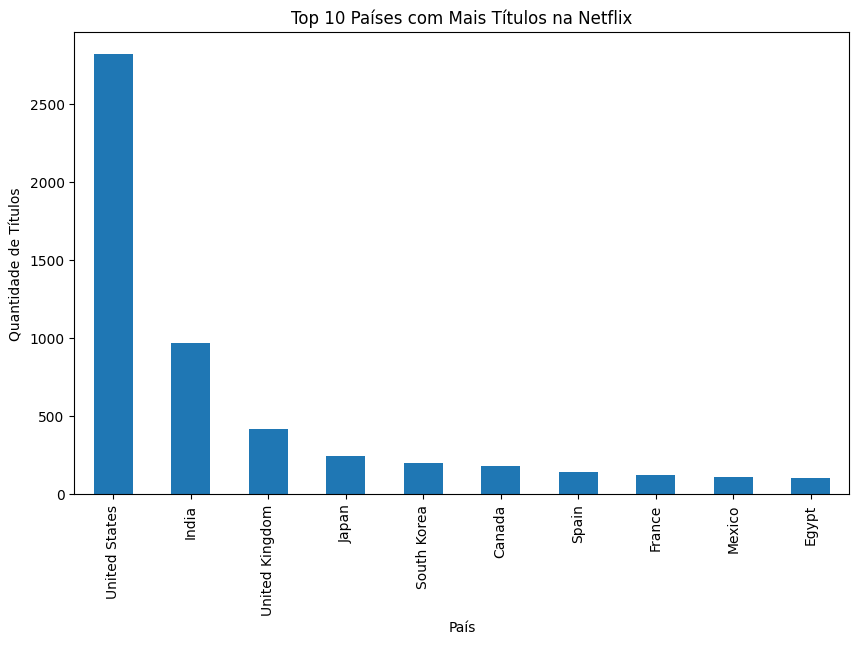

In [ ]:
plt.figure(figsize=(10, 6))
netflix_df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Países com Mais Títulos na Netflix')
plt.xlabel('País')
plt.ylabel('Quantidade de Títulos')
plt.show()

# 6. Gêneros mais comuns na Netflix

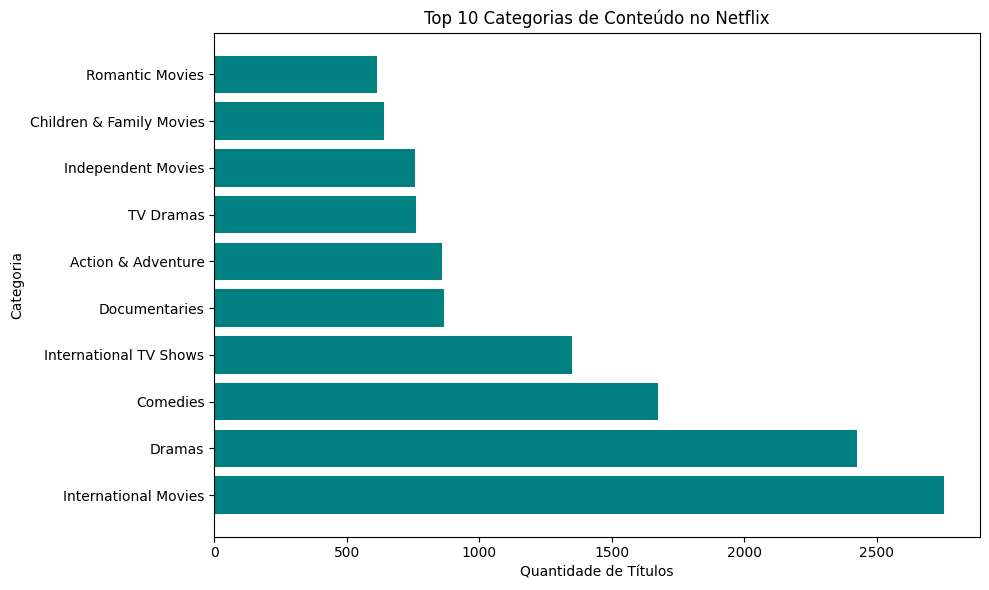

As categorias mais populares no Netflix incluem 'Dramas' com 2427 títulos, seguida por 'Comedies' e 'Action & Adventure'. Isso mostra que o catálogo do Netflix tem uma forte presença de conteúdo dramático e cômico.


In [ ]:
# Separando as categorias (que estão na coluna 'listed_in') e contando a frequência de cada uma
categories = netflix_df['listed_in'].str.split(',').explode().str.strip()
categories_by_count = categories.value_counts().head(10)  # Pegando as 10 categorias mais populares

# Criando um gráfico de barras para visualizar as categorias mais populares
plt.figure(figsize=(10, 6))
plt.barh(categories_by_count.index, categories_by_count.values, color='teal')
plt.title('Top 10 Categorias de Conteúdo no Netflix')
plt.xlabel('Quantidade de Títulos')
plt.ylabel('Categoria')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Gerando o texto explicativo
print(f"As categorias mais populares no Netflix incluem 'Dramas' com {categories_by_count['Dramas']} títulos, seguida por 'Comedies' e 'Action & Adventure'. Isso mostra que o catálogo do Netflix tem uma forte presença de conteúdo dramático e cômico.")

#7. Quais são as classificações indicativas mais comuns na Netflix ?

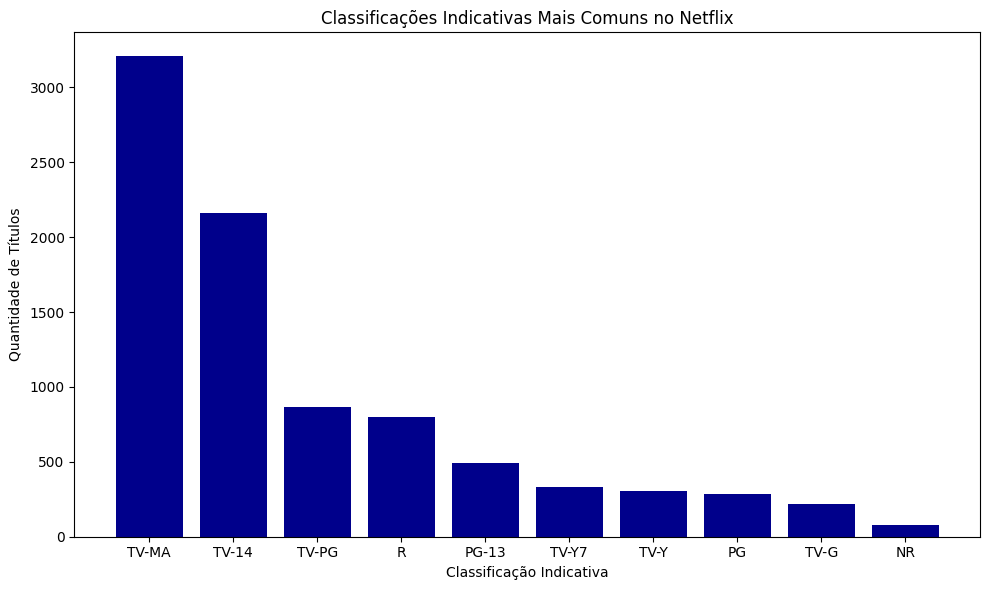

As classificações indicativas mais comuns no Netflix incluem 'TV-MA' com 3207 títulos, seguida por 'TV-14' e 'R'. Isso sugere que há uma grande quantidade de conteúdo voltado para públicos mais maduros.


In [ ]:
#7. Quais são as classificações indicativas mais comuns na Netflix ?

titles_by_rating = netflix_df['rating'].value_counts().head(10)  # Pegando as 10 classificações indicativas mais comuns

# Criando um gráfico de barras para visualizar a quantidade de títulos por classificação indicativa
plt.figure(figsize=(10, 6))
plt.bar(titles_by_rating.index, titles_by_rating.values, color='darkblue')
plt.title('Classificações Indicativas Mais Comuns no Netflix')
plt.xlabel('Classificação Indicativa')
plt.ylabel('Quantidade de Títulos')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Gerando o texto explicativo
print(f"As classificações indicativas mais comuns no Netflix incluem 'TV-MA' com {titles_by_rating['TV-MA']} títulos, seguida por 'TV-14' e 'R'. Isso sugere que há uma grande quantidade de conteúdo voltado para públicos mais maduros.")

# 8. Regressão linear base Netflix

Analisando a base é possivel encontrar o coeficiente de tempo e chegar ao insight, que ao longo do tempo a quantia de tempo em filmes e de series vem diminuindo a cada ano, levando a series curtas com menos temporadas e filmes mais rapidos.

In [33]:
df_movies = netflix_df[netflix_df['type'] == 'Movie'].copy()
df_tv_shows = netflix_df[netflix_df['type'] == 'TV Show'].copy()

# Tratamento de dados da coluna 'duration' para extrair dos filmes duração em minutos
df_movies['duration_num'] = df_movies['duration'].str.extract('(\d+)').astype(float)

# Tratamento de dados da coluna 'duration' para extrair de séries duração em minutos
df_tv_shows['duration_num'] = df_tv_shows['duration'].str.extract('(\d+)').astype(float)

# Filtro de dados para a regressão
df_movies_clean = df_movies[['release_year', 'duration_num']].dropna()
df_tv_shows_clean = df_tv_shows[['release_year', 'duration_num']].dropna()

# Regressão para filmes
X_movies = df_movies_clean[['release_year']]
y_movies = df_movies_clean['duration_num']
model_movies = LinearRegression().fit(X_movies, y_movies) # duração em minutos por ano de lançamento

# Regressão para séries
X_tv_shows = df_tv_shows_clean[['release_year']]
y_tv_shows = df_tv_shows_clean['duration_num']
model_tv_shows = LinearRegression().fit(X_tv_shows, y_tv_shows) # número de temporadas por ano de lançamento

# Coeficientes de filmes
movies_coef = model_movies.coef_[0]

# Coeficientes de séries
tv_shows_coef = model_tv_shows.coef_[0]

# Prints e Insights:
print(f"Filmes: \n Coeficiente = {movies_coef}")
print(f"Séries de TV: \n Coeficiente = {tv_shows_coef}")

print("\nInsights:")
print(f"- A duração dos filmes diminui em média {movies_coef:.2f} minutos por ano.")
print(f"- O número de temporadas das séries diminui em média {tv_shows_coef:.3f} temporadas por ano.")

Filmes: 
 Coeficiente = -0.6028654157788547
Séries de TV: 
 Coeficiente = -0.024869563067996807

Insights:
- A duração dos filmes diminui em média -0.60 minutos por ano.
- O número de temporadas das séries diminui em média -0.025 temporadas por ano.


#9. Relação de duração e avaliação
Há uma correlação muito fraca(coeficiente = 0.13), mas estatisticamente significativa por ser uma base grande. Entre a duração de um filme e sua avaliação no IMDb, filmes mais longos costumam ter avaliações ligeiramente superiores, porem o efeito notado é mínimo.

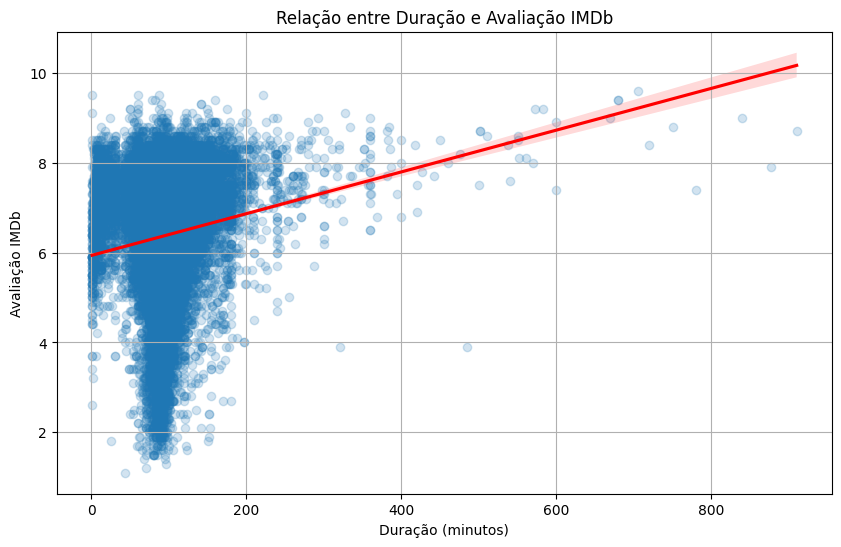

In [36]:
# Limpeza e conversão de dados
imdb_df['runtime'] = imdb_df['runtime'].str.extract('(\d+)').astype(float)
imdb_df['imdbRating'] = pd.to_numeric(imdb_df['imdbRating'], errors='coerce')

# Análise de correlação entre duração do filme e nota do IMDb
movies_cleaned = imdb_df.dropna(subset=['runtime', 'imdbRating'])
correlation, p_value = stats.pearsonr(movies_cleaned['runtime'], movies_cleaned['imdbRating'])

# Visualização da relação
plt.figure(figsize=(10, 6))
sns.regplot(x='runtime', y='imdbRating', data=movies_cleaned, scatter_kws={'alpha':0.2}, line_kws={"color": "red"})
plt.title('Relação entre Duração e Avaliação IMDb')
plt.xlabel('Duração (minutos)')
plt.ylabel('Avaliação IMDb')
plt.grid(True)
plt.show()

#10. Comparação de Filmes Disponíveis no Netflix e Não-Disponíveis
Apesar de nao ser visivel no grafico filmes disponíveis no Netflix têm uma avaliação média ligeiramente maior (6.55) do que aqueles que não estão disponíveis (6.37), sugerindo que o Netflix seleciona filmes com avaliações mais altas para.

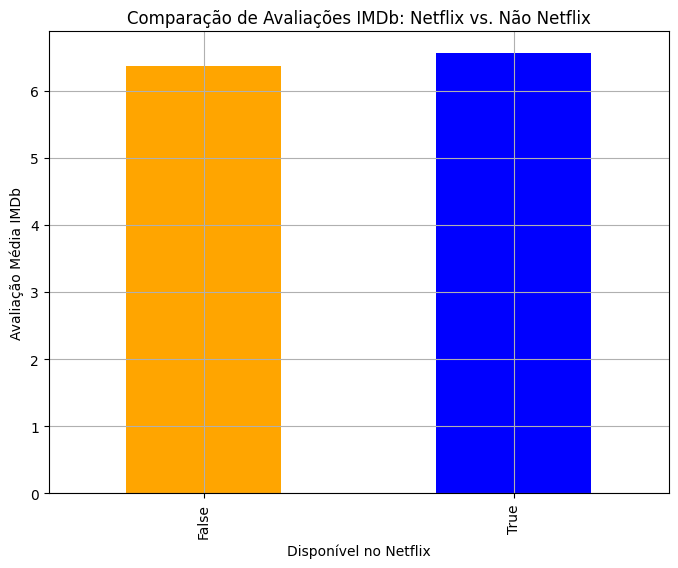

In [43]:
# Junção dos dois datasets para verificar quais filmes estão disponíveis no Netflix
combined_data = pd.merge(imdb_df, netflix_df, left_on='title', right_on='title', how='left', indicator=True)
combined_data['on_netflix'] = combined_data['_merge'] == 'both'

# Comparação das avaliações IMDb para filmes no Netflix vs. fora
netflix_vs_nonnetflix = combined_data.groupby('on_netflix')['imdbRating'].mean()

# Visualização da comparação
plt.figure(figsize=(8, 6))
netflix_vs_nonnetflix.plot(kind='bar', color=['orange', 'blue'])
plt.title('Comparação de Avaliações IMDb: Netflix vs. Não Netflix')
plt.xlabel('Disponível no Netflix')
plt.ylabel('Avaliação Média IMDb')
plt.grid(True)
plt.show()

#Conclusão

Após uma análise detalhada da base de dados da Netflix e do IMDb, é possível observar que, desde sua ascensão nos anos 2000, a plataforma desempenhou um papel central na transformação do consumo de conteúdo audiovisual, refletindo mudanças significativas na indústria cinematográfica. Embora os Estados Unidos continuem dominando como potência global no cinema, com a maioria das produções originárias de Hollywood, há uma crescente presença de produções internacionais, especialmente da Índia, Espanha e Coreia do Sul. A Netflix diversificou seu catálogo ao longo do tempo, inicialmente com uma predominância de filmes, mas gradualmente equilibrando a oferta com séries e documentários, alinhando-se ao comportamento de consumo em que os espectadores preferem acompanhar séries em vez de filmes longos. Além disso, foi identificada uma tendência de redução na duração dos filmes e séries ao longo dos anos, reflexo do crescimento dos vídeos curtos e da diminuição da paciência do público para consumir conteúdos longos. Gêneros como documentários e biografias, que oferecem valor informativo além do entretenimento, tendem a obter avaliações mais altas no IMDb, destacando a preferência por conteúdo educativo. Assim, a Netflix segue moldando as preferências globais de consumo, ao mesmo tempo que se adapta às demandas por conteúdos mais curtos e diversificados.